In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Autoencoders

Problem: Huge data sets provides huge networks

Solution: *learn* a compact representation

![](autoencoder.png)

Essentially a datacompression algorithm

https://blog.keras.io/building-autoencoders-in-keras.html

![](mnist_autoencoder.png)

## Autoencoder use cases

* Denoising
* Dimensionality reduction for visualisation
* Transfer learning

=> Unsupervised 'learning'

## Example: MNIST autoencoder

Let's create an MNIST autoencoder, where we go from 784 pixels to 32 'neurons'

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


In [8]:
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

### Step 1: Create layers

In [9]:
import keras.layers as layers
import keras.models as models

encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = layers.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(32, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


## Step 2: Create autoencoder


In [10]:
autoencoder = models.Model(input_img, decoded)

## Step 3: Create encoder

In [11]:
encoder = models.Model(input_img, encoded)

## Step 4: Create decoder

In [12]:
encoded_input = layers.Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = models.Model(encoded_input, decoder_layer(encoded_input))

![](autoencoder.png)

## Step 5: Train entire autoencoder

In [13]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [19]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 2/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0047 - val_loss: 0.0047
Epoch 3/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0046 - val_loss: 0.0046
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 5/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0045 - val_loss: 0.0045
Epoch 6/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0044 - val_loss: 0.0044
Epoch 7/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0044 - val_loss: 0.0044
Epoch 8/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0044 - val_loss: 0.0044
Epoch 9/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0043 - val_loss: 0.0044
Epoch

In [20]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

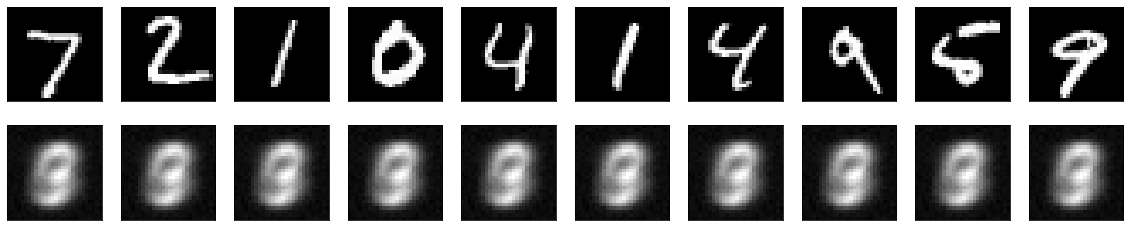

In [21]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Exercise: deep autoencoder

![](autoencoder.png)

Use the following encoder layout:
```python
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)
```
1. Create the necessary layers
2. Create the autoencoder by using the first and last layers
3. Create the encoder by using the first and encoded layers
4. Create the decoder by using an input layers (32) and the output layer from the autoencoder
5. Train the autoencoder
6. Verify that it works!